<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Тема 6. Задача восстановления регрессии</center>
## <center>Практика. Линейная регрессия</center>
<center>*Материал тот же, что в специализации "Машинное обучение и анализ данных" (и автор тот же), поэтому распространяется без решения.*

### Часть 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1]. Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [2]:
data = pd.read_csv("../../data/weights_heights.csv", index_col="Index")

Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

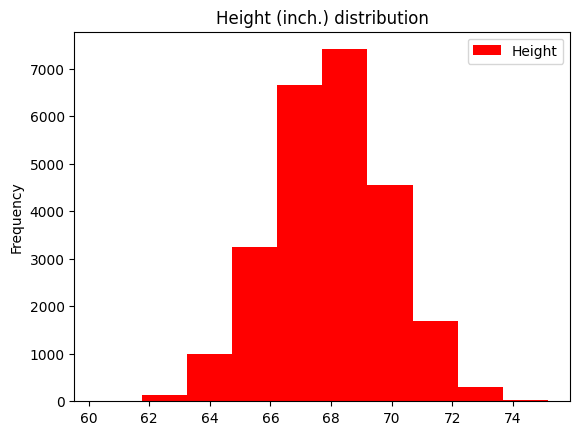

In [3]:
data.plot(y="Height", kind="hist", color="red", title="Height (inch.) distribution");

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.**

In [4]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


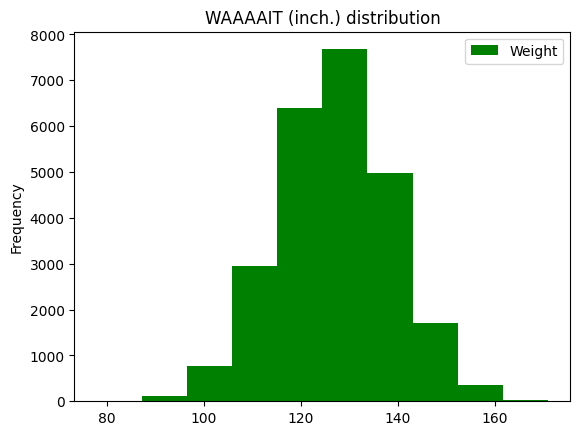

In [5]:
data.plot(y="Weight", kind="hist", color="green", title="WAAAAIT (inch.) distribution");

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [7]:
data["BMI"] = data.apply(lambda row: make_bmi(row["Height"], row["Weight"]), axis=1)

**[3]. Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.**

In [8]:
data.head()

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


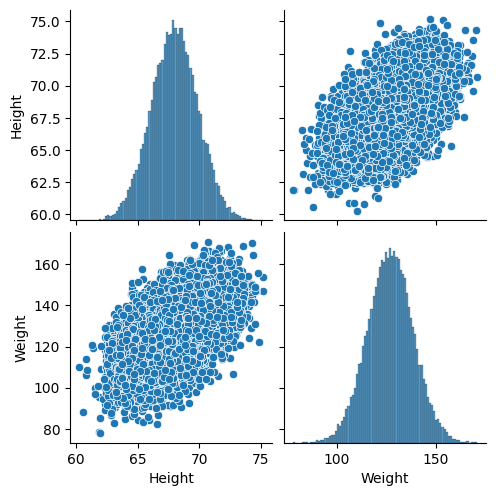

In [9]:
sns.pairplot(data.iloc[:, :-1])

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».**

<Axes: xlabel='Weight_cat', ylabel='Height'>

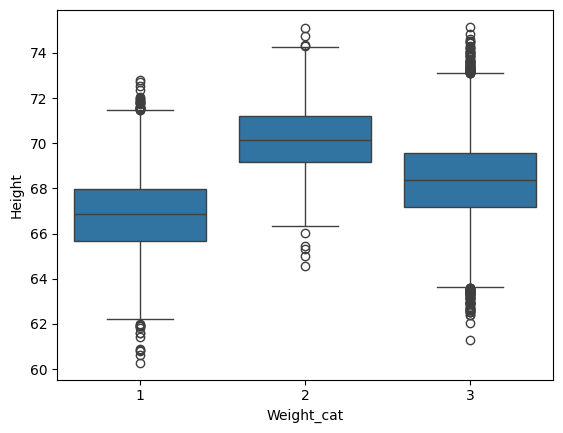

In [12]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 2
    else:
        return 3

data["Weight_cat"] = data["Weight"].apply(weight_category)
sns.boxplot(data, y="Height", x="Weight_cat")

**[5]. Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.**

<Axes: title={'center': 'scatter plot зависимости роста от веса'}, xlabel='Weight', ylabel='Height'>

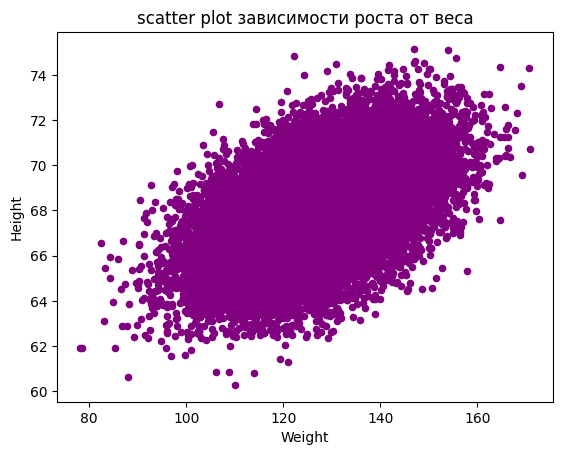

In [21]:
data.plot(y="Height", x="Weight", kind='scatter', color="purple", title="scatter plot зависимости роста от веса")

In [ ]:
# sns.scatterplot(data, y="Height", x="Weight", kind='scatter')

## Часть 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6]. Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:**
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [22]:
def error(w0 ,w1):
    y = data.Height
    x = data.Weight
    err = 0.0
    s = 0.0
    for i in range(1,len(data.index)):
        err = (y[i] - (w0 + w1 * x[i])) ** 2
        s += err
    return s

In [23]:
# function of dependencies "Y" from "X"
def func(w,x):
    return (w[0] + w[1] * x)

# quadratic error function
def qdrtErr(w):
    return ((data['Height'] - (w[0] + w[1] * data['Weight'])) ** 2).sum()

In [ ]:
qdrtErr()

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7]. Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.**

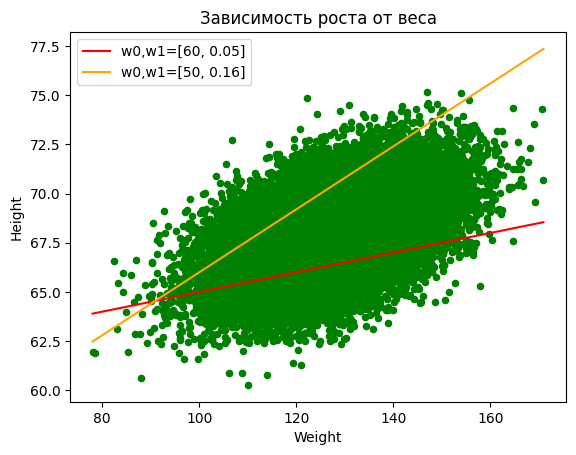

In [24]:
data.plot(y="Height", x="Weight", kind='scatter', color="green", title="Зависимость роста от веса")

start = data['Weight'].min()
end = data['Weight'].max()
tempX = np.linspace(start, end)
w1 = [60, 0.05]
w2 = [50, 0.16]
y1 = func(w1, tempX)
y2 = func(w2, tempX)
plt.plot(tempX,y1,color='red',label='w0,w1='+str(w1))
plt.plot(tempX,y2,color='orange',label='w0,w1='+str(w2))
plt.legend(loc='best')
plt.show()

Минимизация квадратичной функции ошибки - относительная(o?) простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8]. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.**

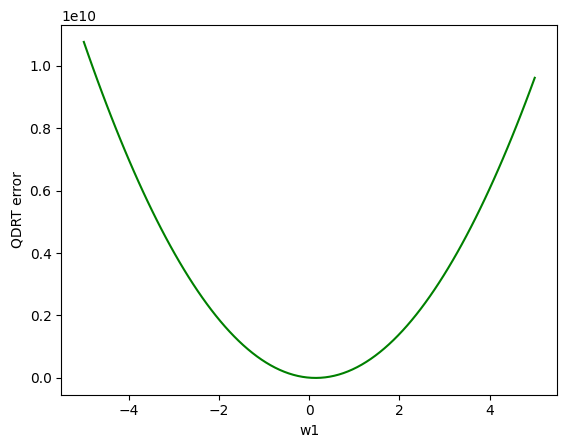

In [25]:
temp_w1=np.linspace(-5,5,100)
temp_error = [qdrtErr([50, i]) for i in temp_w1]
plt.ylabel('QDRT error')
plt.xlabel('w1')
plt.plot(temp_w1,temp_error,color='green')
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9]. С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$.**

In [37]:
import scipy.optimize as op
def op_error(x):
    return qdrtErr([50,x])

w1opt = op.minimize_scalar(op_error,bounds=(-5, 5), method='bounded')
print(w1opt)
#      fun: 79512.21728699488
#  message: 'Solution found.'
#     nfev: 6
#   status: 0
#  success: True
#        x: 0.14109203728834441

 message: Solution found.
 success: True
  status: 0
     fun: 79512.217286995
       x: 0.14109203728834374
     nit: 6
    nfev: 6


In [38]:
print(w1opt.data.Weight)


AttributeError: data

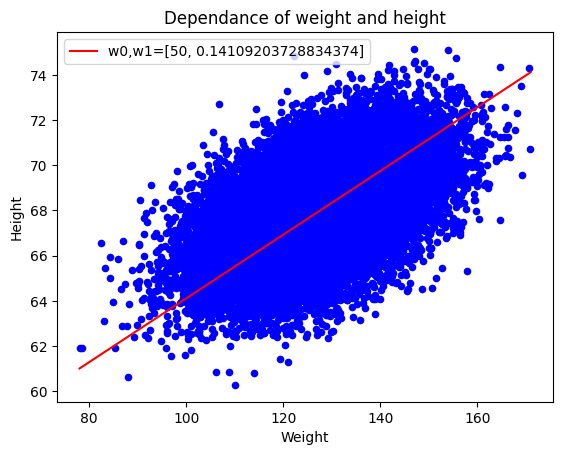

In [27]:
data.plot(x='Weight',y='Height',kind='scatter', color='blue', title='Dependance of weight and height')

start = data['Weight'].min()
end = data['Weight'].max()
tempX = np.linspace(start, end)
tempW = [50, w1opt.x]
tempY = func(tempW, tempX)
plt.plot(tempX, tempY, color='red', label='w0,w1='+str(tempW))
plt.legend(loc='upper left')
plt.show()

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [28]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

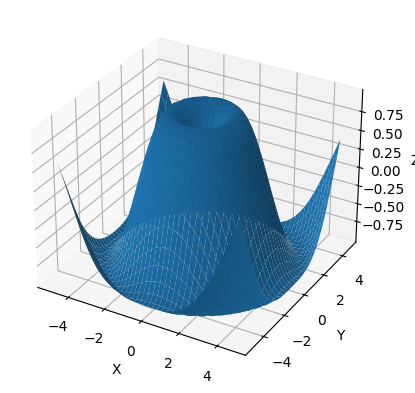

In [33]:
fig = plt.figure()
# ax = fig.gca(projection="3d")  # get current axis
ax = fig.add_subplot(111, projection='3d')


# Создаем массивы NumPy с координатами точек по осям X и У.
# Используем метод meshgrid, при котором по векторам координат
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

# Наконец, используем метод *plot_surface* объекта
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

**[10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».**

AttributeError: 'list' object has no attribute 'ndim'

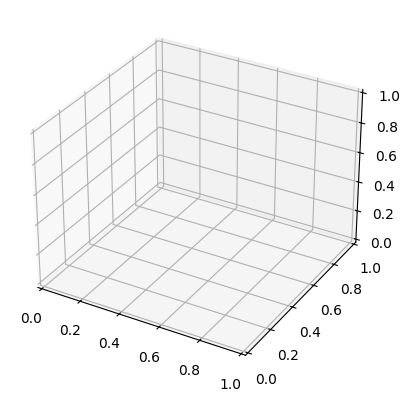

In [41]:
fig = plt.figure()
# ax = fig.gca(projection="3d")  # get current axis
ax = fig.add_subplot(111, projection='3d')


# Создаем массивы NumPy с координатами точек по осям X и У.
# Используем метод meshgrid, при котором по векторам координат
# создается матрица координат. Задаем нужную функцию Z(x, y).
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

start = data['Weight'].min()
end = data['Weight'].max()
tempX = np.linspace(start, end)
tempW = [50, w1opt.x]

temp_w1=np.linspace(-5,5,100)
temp_error = [qdrtErr([50, i]) for i in temp_w1]
X = tempX
Y = tempW
X, Y = np.meshgrid(X, Y)
Z = temp_error
# Наконец, используем метод *plot_surface* объекта
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel("X = «Intercept»")
ax.set_ylabel("Y = «Slope»")
ax.set_zlabel("Z = «Error»")
plt.show()

TypeError: list indices must be integers or slices, not tuple

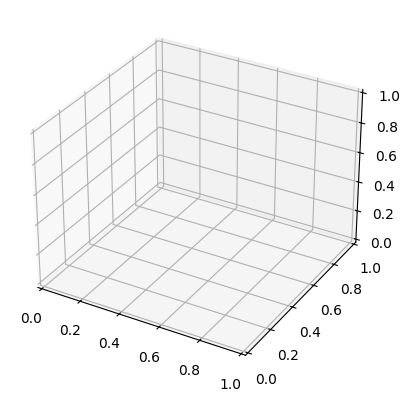

In [46]:
fig = plt.figure()
# ax = fig.gca(projection='3d') # get current axis
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
xlen=len(X)
ylen=len(Y)
X, Y = np.meshgrid(X, Y)
for i in range(ylen):
    for j in range(xlen):
        # print([X[i,j],Y[i,j]])
        Z[i,j] = qdrtErr([X[i,j],Y[i,j]])

# surf = ax.plot_surface(X, Y, Z)
# ax.set_xlabel('Intercept')
# ax.set_ylabel('Slope')
# ax.set_zlabel('Error')
# plt.show()

In [48]:
def measurement_error(w1, w0, data):
    summa = 0.0
    for _, row in data.iterrows():
        summa+=(row['Height'] - (w0 + w1 * row['Weight'])) ** 2
    return summa

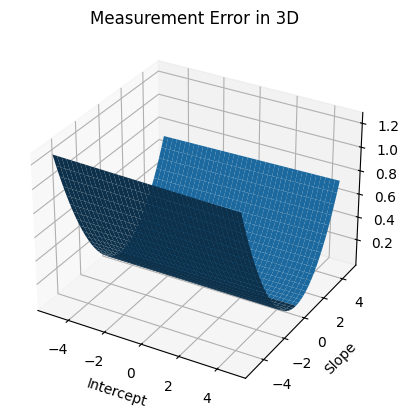

In [52]:
# fig = plt.figure
# # ax = fig.gca(projection='3d')
# ax = fig.add_subplot(111, projection='3d')

fig = plt.figure()
# ax = fig.gca(projection='3d') # get current axis
ax = fig.add_subplot(111, projection='3d')

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
w0, w1 = np.meshgrid(w0, w1)
Z = measurement_error(w1, w0, data)

surf = ax.plot_surface(w0, w1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
ax.set_title('Measurement Error in 3D')
plt.show()

In [53]:
def error_1(w0, w1):
    s=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
     s+=(y[i]-w0-w1*x[i])**2
    return s

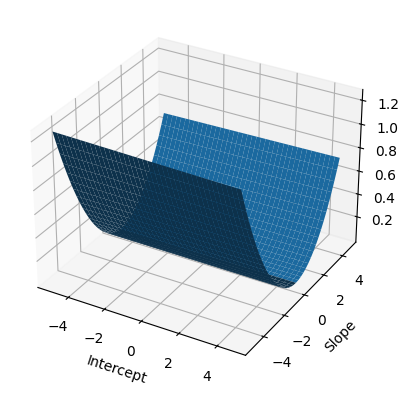

In [56]:
fig = plt.figure()
# ax = fig.gca(projection='3d') # get current axis
ax = fig.add_subplot(111, projection='3d')


w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(w0, w1)
E = error_1(W0,W1)

# используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(W0, W1, E)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [58]:
from scipy.optimize import minimize, rosen, rosen_der

**[11]. С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.**

In [76]:
def measurement_error(w1, w0, data):
    summa = 0.0
    for _, row in data.iterrows():
        summa+=(row['Height'] - (w0 + w1 * row['Weight'])) ** 2
    return summa

In [69]:
result = op.minimize(qdrtErr,[0,0],bounds=[(-100, 100),(-5,5)], method='L-BFGS-B')
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 67545.28708631505
        x: [ 5.757e+01  8.201e-02]
      nit: 5
      jac: [-1.455e-03 -2.910e-03]
     nfev: 36
     njev: 12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


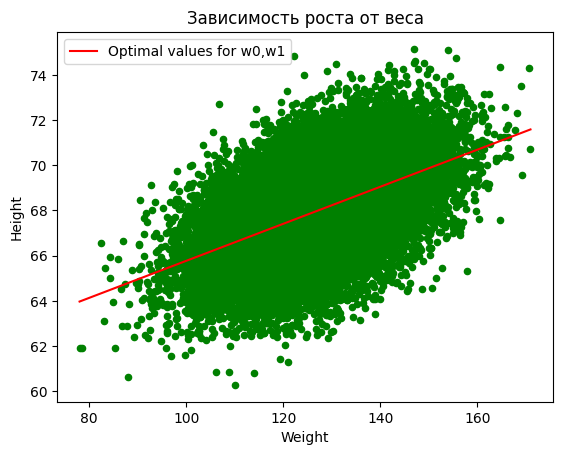

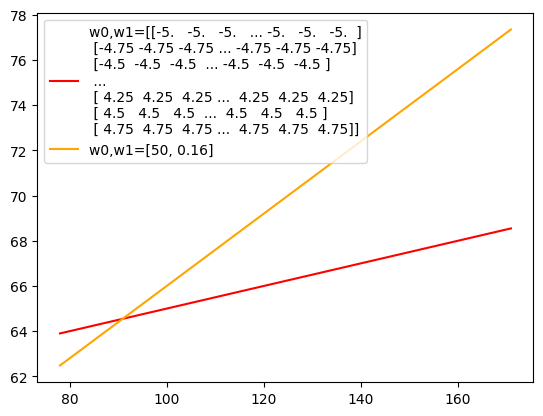

In [74]:
data.plot(y="Height", x="Weight", kind='scatter', color="green", title="Зависимость роста от веса")

start = data['Weight'].min()
end = data['Weight'].max()
tempX = np.linspace(start, end)
tempW = result.x
tempY = func(tempW, tempX)
plt.plot(tempX, tempY, color='red',label='Optimal values for w0,w1')
plt.legend(loc='best')
plt.show()
plt.plot(tempX,y1,color='red',label='w0,w1=' + str(w1))
plt.plot(tempX,y2,color='orange',label='w0,w1=' + str(w2))
plt.legend(loc='best')
plt.show()

In [77]:
def yyy(w):
    return measurement_error(w[1], w[0],data)
    
w_opt = minimize(yyy, [0.0, 0.0], method='L-BFGS-B', bounds=([-100, 100], [-5, 5]))
print(w_opt)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 67545.28708533282
        x: [ 5.757e+01  8.201e-02]
      nit: 9
      jac: [-3.638e-02 -9.895e-02]
     nfev: 45
     njev: 15
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [ ]:
result = op.minimize(qdrtErr,[0,0],bounds=[(-100, 100),(-5,5)], method='L-BFGS-B')
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 67545.28708631505
        x: [ 5.757e+01  8.201e-02]
      nit: 5
      jac: [-1.455e-03 -2.910e-03]
     nfev: 36
     njev: 12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


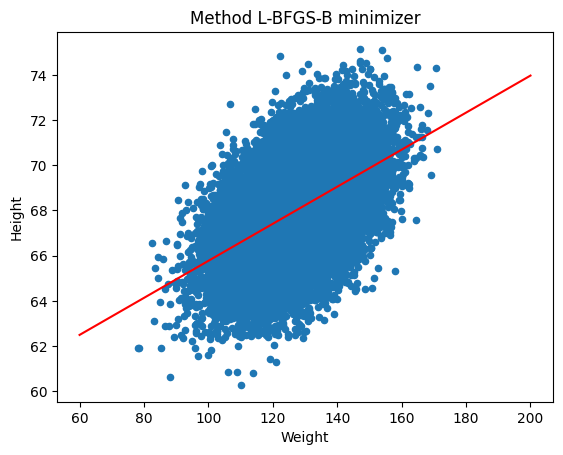

In [78]:
w0_opt = w_opt.x[0]
w1_opt = w_opt.x[1]
    
def y(x):
    return w0_opt + w1_opt * x
    
x = np.linspace(60, 200)
data.plot(x='Weight', y='Height', kind='scatter', title='Method L-BFGS-B minimizer')
plt.plot(x, y(x),color='red')

https://github.com/tsopronyuk/Linear_Regression_Python?tab=readme-ov-file

In [82]:
def errorr1(w):
    s=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
     s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

import scipy.optimize as optimize
minn = optimize.minimize(errorr1, np.array([0,0]), method = 'L-BFGS-B', bounds=((-100,100),(-5, 5)))

minn.x, minn.fun

(array([57.57161356,  0.08200739]), 67544.15205503914)

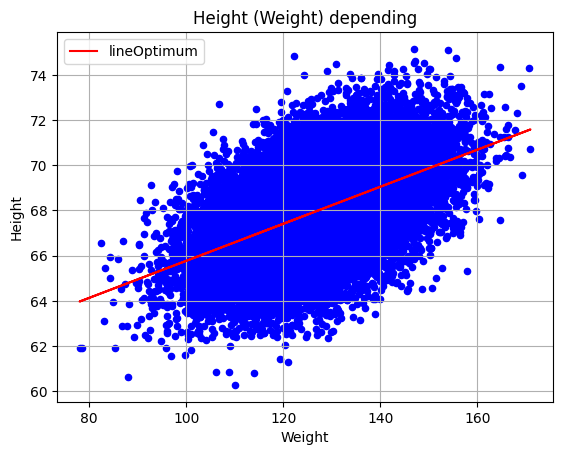

In [83]:
x=np.array(data['Weight'])

w0,w1=minn.x
y = [w0+t*w1 for t in x]

data.plot(y='Height',x='Weight', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')